In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df_train = pd.read_csv('train.csv')

df_val1= pd.read_csv('validate1.csv')
df_val2 = pd.read_csv('validate2.csv')

df_test = pd.read_csv('test.csv')

In [47]:
df_val1.shape
df_val2.shape

(2037, 4)

In [53]:
train = pd.concat([df_train, df_val2])
test = pd.concat([df_test, df_val1])

In [54]:
print(train.shape)
print(test.shape)

(13332, 4)
(3424, 4)


In [56]:
train_counts = get_unique_targets(train)

In [57]:
test_counts = get_unique_targets(test)

In [60]:
train_counts.head()

,word,count
0,the,2186
1,of,1214
2,to,970
3,and,820
4,a,791


In [59]:
test_counts.head()

,word,count
0,the,640
1,of,314
2,and,275
3,to,240
4,a,226


In [6]:
def get_unique_targets(df):
    unique_df = pd.DataFrame(df['target'].value_counts())
    reset_df = unique_df.reset_index()
    reset_df.rename(columns = {'index': 'word', 'target': 'count'}, inplace = True)
    return reset_df

In [22]:
unique_train = get_unique_targets(df_train)
unique_test = get_unique_targets(df_test)

In [20]:
unique_train.head()

,word,count
0,the,1876
1,of,992
2,to,846
3,and,657
4,a,652


In [24]:
unique_test.head()

,word,count
0,the,274
1,of,156
2,and,137
3,a,107
4,to,94


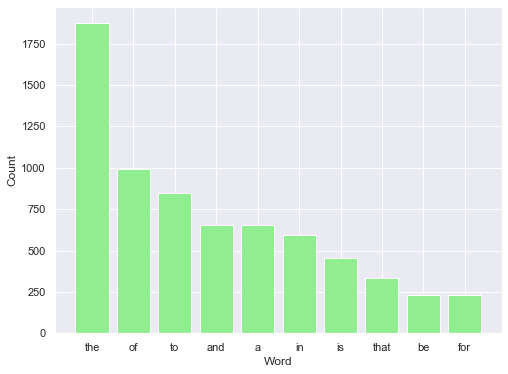

In [34]:
fig, ax = plt.subplots(figsize = (8,6))

sns.set(style = 'darkgrid')

plt.bar(unique_train['word'][:10], unique_train['count'][:10], color = 'lightgreen')
plt.xlabel('Word', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.savefig('train_top10.png', bbox_inches = 'tight')


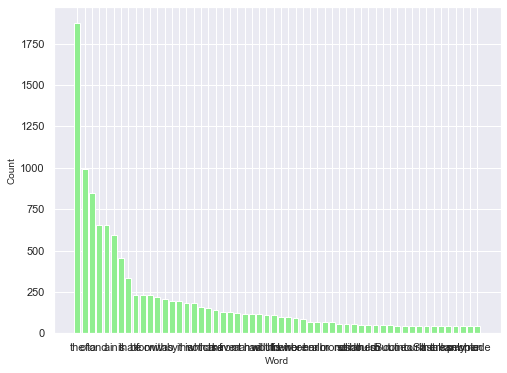

In [39]:
fig, ax = plt.subplots(figsize = (8,6))

sns.set(style = 'darkgrid')

plt.bar(unique_train['word'][:56], unique_train['count'][:56], color = 'lightgreen')
plt.xlabel('Word', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()


In [40]:
unique_train.tail()

,word,count
51,can,44
52,only,44
53,people,44
54,when,43
55,made,43


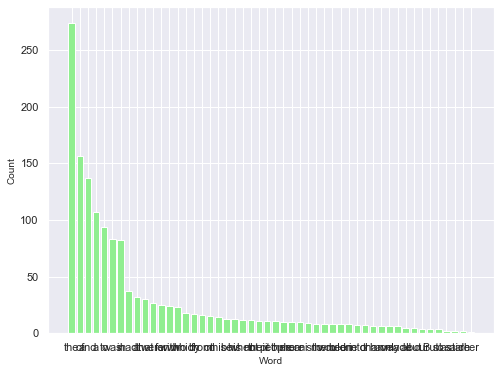

In [37]:
fig, ax = plt.subplots(figsize = (8,6))

sns.set(style = 'darkgrid')

plt.bar(unique_test['word'][:50], unique_test['count'][:50], color = 'lightgreen')
plt.xlabel('Word', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()


In [ ]:

# display some images for every different word

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "../input/images/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()